In [86]:
#import libararies and pull in dataset as a dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data_path = r"C:\Users\schmi\EE658\EE658-Machine-Learning\Neural Networks\Assignment 3\healthcare-dataset-stroke-data.csv"
df= pd.read_csv(data_path)

In [4]:
#_________________DATA EXPLORATION ___________________#
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()
# we can see that bmi is the only category that containing null entries


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [19]:
#find the unique values - basically all of the object type
objectColumns = df.dtypes[df.dtypes == object]
numberColumns = df.dtypes[df.dtypes != object]
text_to_num = list(objectColumns.index)
num_list = list(numberColumns.index)
print('numerical colums are: ', num_list)
for i in range(len(text_to_num)):
    col_name = text_to_num[i]
    print("\nthere are " + str(df[col_name].nunique()) +" different types in the column "+ col_name +":\n")
    print(df[col_name].unique())

numerical colums are:  ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

there are 3 different types in the column gender:

['Male' 'Female' 'Other']

there are 2 different types in the column ever_married:

['Yes' 'No']

there are 5 different types in the column work_type:

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

there are 2 different types in the column Residence_type:

['Urban' 'Rural']

there are 4 different types in the column smoking_status:

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [47]:
# find the number of times each value is used
genders_df = df['gender'].value_counts()
print(genders_df)
genders_options = df['gender'].value_counts().keys().to_list()
genders_count = df['gender'].value_counts().to_list()
print(genders_options)
print(genders_count)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
['Female', 'Male', 'Other']
[2994, 2115, 1]


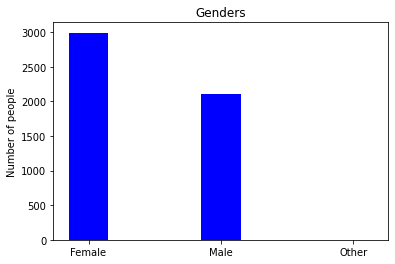

In [87]:
# plot a bar chart showing frequency of each value
plt.bar(genders_options, genders_count, width = 0.3, color="blue")
plt.ylabel('Number of people')
plt.title('Genders')
plt.show()

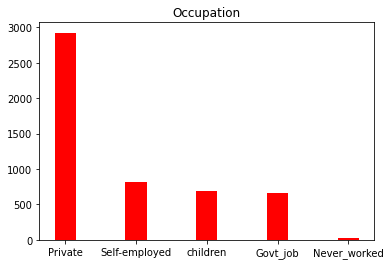

In [88]:
work_df = df['work_type'].value_counts()
work_options = df['work_type'].value_counts().keys().to_list()
work_counts = df['work_type'].value_counts().to_list()
plt.bar(work_options, work_counts, width = 0.3, color="red")
plt.title('Occupation')
plt.show()

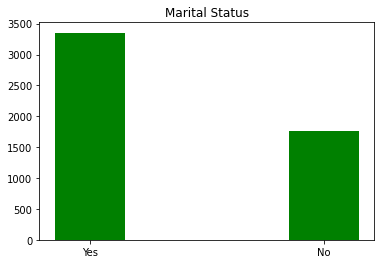

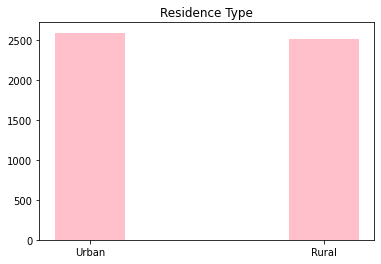

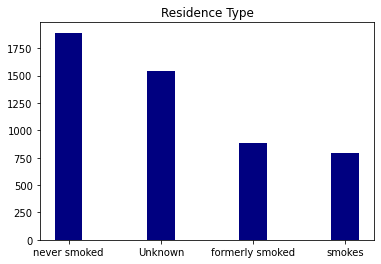

In [98]:
marital_options = df['ever_married'].value_counts().keys().to_list()
marital_count = df['ever_married'].value_counts().to_list()

res_options = df['Residence_type'].value_counts().keys().to_list()
res_count = df['Residence_type'].value_counts().to_list()

smoke_options = df['smoking_status'].value_counts().keys().to_list()
smoke_count = df['smoking_status'].value_counts().to_list()


plt.bar(marital_options, marital_count, width = 0.3, color="green")
plt.title('Marital Status')
plt.show()
plt.bar(res_options, res_count, width = 0.3, color="pink")
plt.title('Residence Type')
plt.show()
plt.bar(smoke_options, smoke_count, width = 0.3, color="navy")
plt.title('Residence Type')
plt.show()

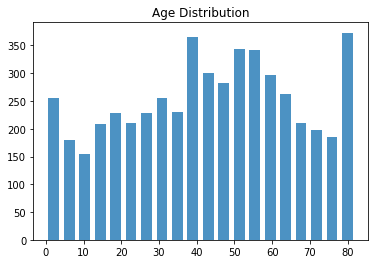

In [90]:
# for each condinuous numerical value -- show a histogram of the values
plt.hist(df['age'].dropna(), bins=20, alpha=0.8, rwidth=0.7)
plt.title('Age Distribution')
plt.show()

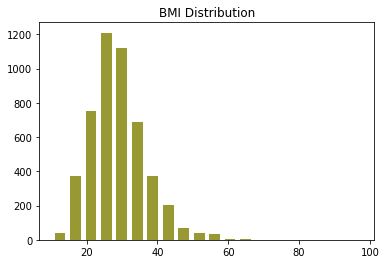

In [93]:
plt.hist(df['bmi'].dropna(), bins=20, alpha=0.8, rwidth=0.7, color = 'olive')
plt.title('BMI Distribution')
plt.show()

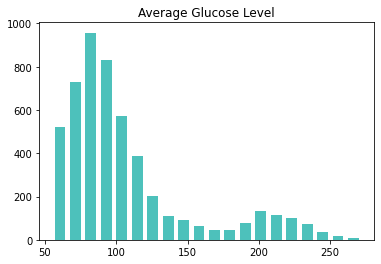

In [94]:
plt.hist(df['avg_glucose_level'].dropna(), bins=20, alpha=0.8, rwidth=0.7, color='lightseagreen')
plt.title('Average Glucose Level')
plt.show()

0    4612
1     498
Name: hypertension, dtype: int64


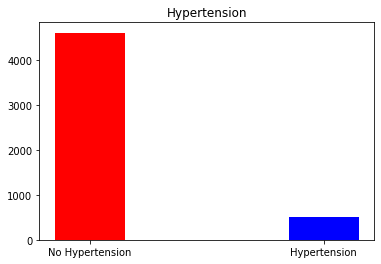

In [102]:
hype_options = df['hypertension'].value_counts().keys().to_list()
hype_count = df['hypertension'].value_counts().to_list()
print(df['hypertension'].value_counts())
plt.bar(hype_options, hype_count, width = 0.3, color=["red", "blue"])
plt.xticks(hype_options, ('No Hypertension', 'Hypertension'))
plt.title('Hypertension')
plt.show()

0    4834
1     276
Name: heart_disease, dtype: int64


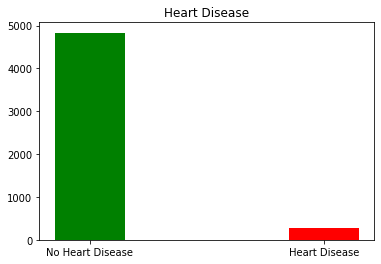

In [103]:
heart_options = df['heart_disease'].value_counts().keys().to_list()
heart_count = df['heart_disease'].value_counts().to_list()
print(df['heart_disease'].value_counts())
plt.bar(heart_options, heart_count, width = 0.3, color=["green", "red"])
plt.xticks(heart_options, ('No Heart Disease', 'Heart Disease'))
plt.title('Heart Disease')
plt.show()

In [107]:
# for each feature in the data find the number of missing values
df.info()

missing_bmi = df['bmi'].isnull().sum()
print(' there are ',missing_bmi, 'missing values from BMI')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
 there are  201 missing values from BMI


In [ ]:
#_________________DATA PREPARATION______________________#

In [145]:
print(df.bmi.describe())
print(df.avg_glucose_level.describe())
bounds = list(df.avg_glucose_level.quantile([0.25,0.5,0.75]))
bounds = [int(x) for x in bounds]#convert to integer to work with inside the functions down the line
print(bounds)
print(bounds[0])

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64
count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64
[77, 91, 114]
77


In [146]:
#for each missing or unuseable value -- pseudocode stragegy and implement
# BMI and age may have a strong correlation? see average BMI by age and fill in
# looking at the glucose histogram, there seems to be a very similar distribution with the glucose levels


#create a function to calculate the average BMI based on glucose levels
# look at the quanitle separation, we have 4 groupings of values based on the distribution
# it is in the lower, lower middle, upper middle, or upper categories 
#-- divide and take the average BMI of each of these
def compute_average_bmi_by_glucose():
    a1 = df[(0 <= df['avg_glucose_level']) & (df['avg_glucose_level'] < bounds[0])]['bmi'].mean()
    a2 = df[(bounds[0] <= df['avg_glucose_level']) & (df['avg_glucose_level'] < bounds[1])]['bmi'].mean()
    a3 = df[(bounds[1] <= df['avg_glucose_level']) & (df['avg_glucose_level'] < bounds[2])]['bmi'].mean()
    a4 = df[(bounds[2] <= df['avg_glucose_level'])]['bmi'].mean()      
    return a1, a2, a3,4


In [149]:
#create a function that will look for the null values and replace with the newly calculated value
def impute_bmi(cols):
    a1, a2, a3,a4 = compute_average_bmi_by_glucose()
    BMI = cols[0]
    glucose = cols[1]
    
    if pd.isnull(BMI):
        if glucose in range(0,bounds[0]):
            return a1
        elif glucose in range(bounds[0],bounds[1]):
            return a2
        elif glucose in range(bounds[1],bounds[2]):
            return a3
        else:
            return a4
    else:
        return BMI


In [150]:
#now combine those two functions to replace the null values in BMI
df['bmi'] = df[['bmi','avg_glucose_level']].apply(impute_bmi,axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


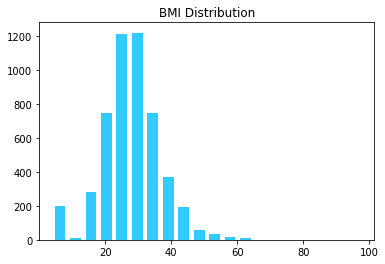

In [153]:
df.info()
#check that we now have non-null values
#plot to make sure the distribution seems normal enough
plt.hist(df['bmi'], bins=20, alpha=0.8, rwidth=0.7, color = 'deepskyblue')
plt.title('BMI Distribution')
plt.show()

In [151]:
#split test and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y_50, test_size=0.3, random_state=45, stratify=y)

KeyboardInterrupt: 

In [ ]:
#normalize data

In [ ]:
#_____________________Model Generation_________#

In [ ]:
#use perceptron in scikit learn to create model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 99)
ppn = Perceptron(eta0 = 0.001)
ppn.fit(X_train, y_train)

In [ ]:
#display confusion matrix and classification results
from sklearn.metrics import classification_report, confusion_matrix  
predictions = ppn.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print(cm)  
score = accuracy_score(y_test, predictions)
print(score)

In [ ]:
#use two layer neural net -- FROM NOTES -- to predict ---- 

# experiment with number of neurons in hidden layer 
# display confusion matrix and classification results



In [ ]:
#use logisticRegression to create model and display a confusion matrix

In [ ]:
#compare the 3 models -- 1) perceptron 2) 2 layer NN 3) logistic regression